In [32]:
#imports and setup
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow.keras
import warnings
warnings.filterwarnings('ignore')
import os
print(os.listdir("./"))

['.ipynb_checkpoints', 'digit_classification.ipynb', 'digit_test.gz', 'digit_train.gz', 'mnist_test.csv', 'mnist_train.csv', 'test-images.idx3-ubyte', 'train-images.idx3-ubyte']


In [44]:
#load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

8


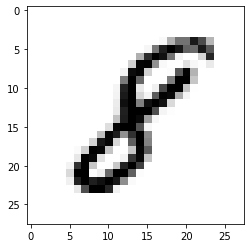

In [46]:
#show a random image as an example
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # The label is 8
plt.imshow(x_train[image_index], cmap='Greys')

In [47]:
#see the shape of the dataset
#60,000 images and each image is 28 by 28 pixels
x_train.shape

(60000, 28, 28)

In [48]:
#reshape and normalize images
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# make sure values are floats we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

#build model and add layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # flatten the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [50]:
#compile and fit the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1982 - accuracy: 0.9406
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0824 - accuracy: 0.9750
Epoch 3/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0571 - accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0416 - accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0350 - accuracy: 0.9883
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0282 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0236 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0213 - accuracy: 0.9927
Epoch 9/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0188 - accuracy: 0.9936
Epoch 10/10
1875/1875 [==============================] - 22s 12m

In [51]:
# evaluate model accuracy
model.evaluate(x_test, y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.0626 - accuracy: 0.9853


[0.0625826045870781, 0.9853000044822693]

9


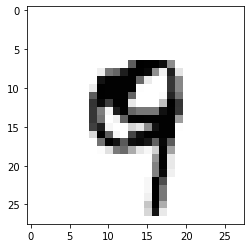

In [52]:
#try individual predictions
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())